In [1]:
import torch
from torch_geometric.data import Data
import networkx as nx

In [6]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)# 定義邊，第一列為起點，第二列為終點，無向圖須雙向設定

x = torch.tensor([[-1], [0], [1]], dtype=torch.float)# 節點名字
data = Data(x=x, edge_index=edge_index)
data

Data(x=[3, 1], edge_index=[2, 4])

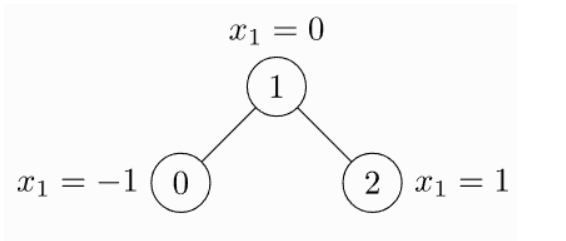


In [7]:
#另一種寫法
edge_index = torch.tensor([[0, 1], [1, 0], [1, 2], [2, 1]], dtype = torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())
data

Data(x=[3, 1], edge_index=[2, 4])

In [8]:
print(f'是否為有向圖:{data.is_directed()}')
print(f'圖形鍵值:{data.keys}')
print(f'節點名稱:{data["x"]}')
print(f'節點個數:{data.num_nodes}')
print(f'邊名稱:{data["edge_index"]}')
print(f'邊:{data.num_edges}')
print(f'節點屬性個數:{data.num_node_features}')
print(f'未連結的節點個數:{data.has_isolated_nodes()}')
print(f'自我連結的節點個數:{data.has_self_loops()}')
print(f'節點屬性個數:{data.num_node_features}')


是否為有向圖:False
圖形鍵值:['x', 'edge_index']
節點名稱:tensor([[-1.],
        [ 0.],
        [ 1.]])
節點個數:3
邊名稱:tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])
邊:4
節點屬性個數:1
未連結的節點個數:False
自我連結的節點個數:False
節點屬性個數:1


In [9]:
device = torch.device('cuda')
data = data.to(device)


In [10]:
list(data["edge_index"].cpu().numpy().T)


[array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 2], dtype=int64),
 array([2, 1], dtype=int64)]

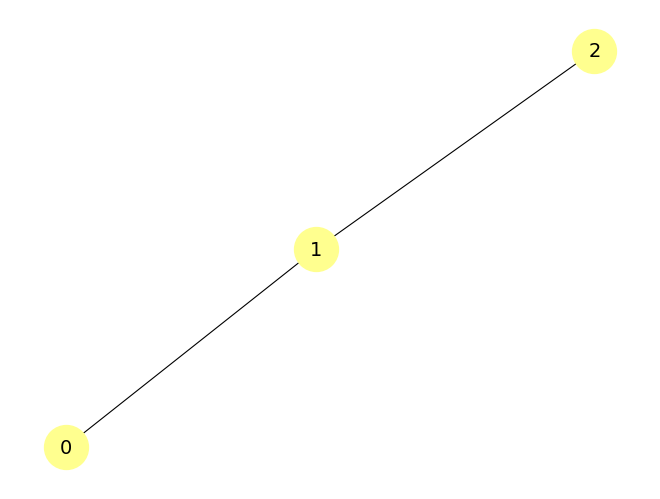

In [13]:
from torch_geometric.utils.convert import to_networkx
def draw_pyg(Data):
    G = to_networkx(Data, to_undirected=True)
    nx.draw(G, with_labels = True,
            node_size = 1000,
            node_color="#ffff8f",
            width=0.8,
            font_size=14,
           )
draw_pyg(data)    


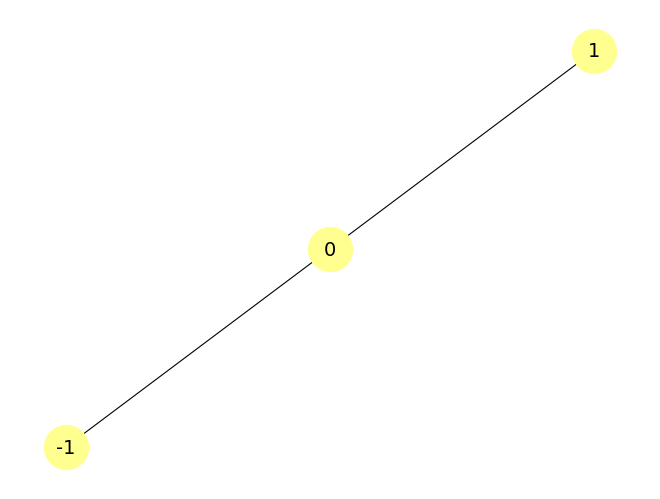

In [17]:
def draw_pyg2(data):
    G = nx.Graph()
    node_list = data['x'].cpu().numpy().reshape(data['x'].shape[0])
    node_list = node_list.astype(int)
    G.add_nodes_from(node_list)
    edges = data["edge_index"].cpu().numpy().T
    edge_list = []
    for item in edges:
        edge_list.append((node_list[item[0]], node_list[item[1]]))
    G.add_edges_from(edge_list)
    nx.draw(G,
        with_labels=True,
        node_size=1000,
        node_color="#ffff8f",
        width=0.8,
        font_size=14,
    )
draw_pyg2(data)

In [18]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root='./graph/ENZYMES', name='ENZYMES')


Extracting graph\ENZYMES\ENZYMES\ENZYMES.zip
Processing...
Done!


In [19]:
len(dataset)


600

In [20]:
dataset.num_classes, dataset.num_node_features



(6, 3)

In [21]:
dataset[0]


Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [22]:
dataset = dataset.shuffle()
dataset[0]

Data(edge_index=[2, 58], x=[14, 3], y=[1])

In [23]:
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='./graph/ShapeNet')

dataset[0]

Extracting graph\ShapeNet\shapenetcore_partanno_segmentation_benchmark_v0_normal.zip
Processing...
Done!


Data(x=[2252, 3], y=[2252], pos=[2252, 3], category=[1])

In [24]:
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet

# KNNGraph：使用最近鄰(KNN)演算法，每一點取6個最近的節點
dataset = ShapeNet(root='./graph/ShapeNet', categories=['Airplane'],
                    pre_transform=T.KNNGraph(k=6))

dataset[0]

C:\Users\ian\anaconda3\lib\site-packages\torch_geometric\data\dataset.py:190: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to delete 'graph\ShapeNet\processed' first
  warnings.warn(
Processing...
Done!


Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1], edge_index=[2, 15108])

In [25]:
dataset = ShapeNet(root='./graph/ShapeNet', categories=['Airplane'],
                    pre_transform=T.KNNGraph(k=6),
                    transform=T.RandomTranslate(0.01))

dataset[0]

C:\Users\ian\anaconda3\lib\site-packages\torch_geometric\deprecation.py:12: UserWarning: 'transforms.RandomTranslate' is deprecated, use 'transforms.RandomJitter' instead
  warnings.warn(out)


Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1], edge_index=[2, 15108])